In [2]:
# 회귀 모델: K-최근접 이웃 회귀, 선형 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

# 훈련 데이터와 테스트 데이터 나눠주는 거, 그리드 서치 (하이퍼파라미터 튜닝)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# 창문해 때 지겹도록 썼던 matplotlib
import matplotlib.pyplot as plt

# numpy 배열, pandas, csv 리더
import numpy as np
import pandas as pd
import csv

In [3]:
# TODO: 여러분들에게 맞는 파일명, 인덱스로 바꾸세요.
filename = 'IHDI.csv' # 파일 이름

# csv 파일의 대략적인 내용을 출력해줍니다.
data = pd.read_csv(filename)
data.head()

,Rank,Country,IHDI,HDI,Loss%,Growth_2010
0,1,Norway,0.899,0.957,6.1,0.021
1,2,Iceland,0.894,0.949,5.8,0.055
2,3,Switzerland,0.889,0.955,6.9,0.015
3,4,Finland,0.888,0.938,5.3,0.040
4,5,Ireland,0.885,0.955,7.3,0.066


In [8]:
# 위 표를 보고 숫자를 넣어주세요.
idx1 = 2 # 독립변수
idx2 = 4 # 종속변수

ValueError: ignored

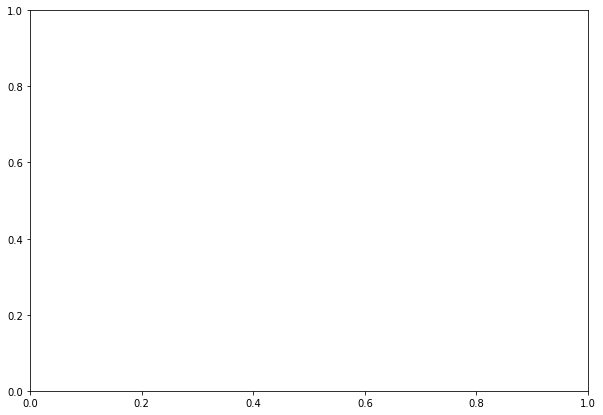

In [12]:
# 데이터 읽어오기 -> 시각화
x_data = []
y_data = []

with open(filename, 'r') as f:
    rdr = csv.reader(f) # 사람에 따라 delimiter='\t' 추가해야 하는 경우 있음
    next(rdr) # 헤더 제거
    
    for line in rdr:
        try:
          x_data.append(float(line[idx1]))
          x_data.append(float(line[idx2]))
        except:
          continue

plt.figure(figsize=(10,7))
plt.scatter(x_data, y_data)
plt.show()

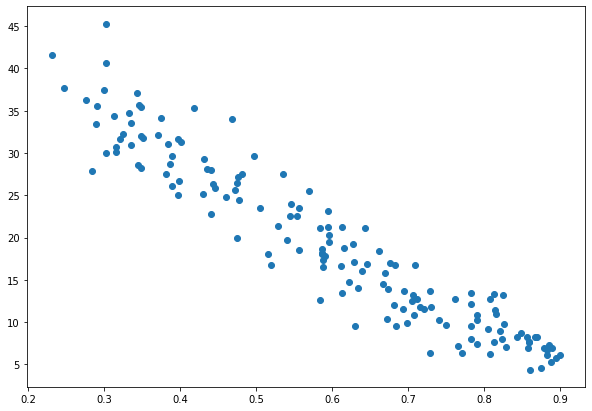

이렇게 편한 방법이 있는데 왜 노가다를 했나 싶죠?
가르치는 사람들의 흔한 변은 아마 다들 아실 거라 생각합니다.


In [14]:
# 좀 더 쉬운 방법으로 해봅시다.
x_data = data['IHDI'].to_numpy()
y_data = data['Loss%'].to_numpy()

plt.figure(figsize=(10,7))
plt.scatter(x_data, y_data)
plt.show()

print(b'\xec\x9d\xb4\xeb\xa0\x87\xea\xb2\x8c \xed\x8e\xb8\xed\x95\x9c \xeb\xb0\xa9\xeb\xb2\x95\xec\x9d\xb4 \xec\x9e\x88\xeb\x8a\x94\xeb\x8d\xb0 \xec\x99\x9c \xeb\x85\xb8\xea\xb0\x80\xeb\x8b\xa4\xeb\xa5\xbc \xed\x96\x88\xeb\x82\x98 \xec\x8b\xb6\xec\xa3\xa0?'.decode('UTF-8'))
print(b'\xea\xb0\x80\xeb\xa5\xb4\xec\xb9\x98\xeb\x8a\x94 \xec\x82\xac\xeb\x9e\x8c\xeb\x93\xa4\xec\x9d\x98 \xed\x9d\x94\xed\x95\x9c \xeb\xb3\x80\xec\x9d\x80 \xec\x95\x84\xeb\xa7\x88 \xeb\x8b\xa4\xeb\x93\xa4 \xec\x95\x84\xec\x8b\xa4 \xea\xb1\xb0\xeb\x9d\xbc \xec\x83\x9d\xea\xb0\x81\xed\x95\xa9\xeb\x8b\x88\xeb\x8b\xa4.'.decode('UTF-8'))

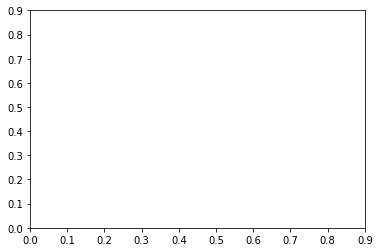

In [17]:
# 위 그래프를 보고, x값과 y값의 범위를 적절히 조절하여 비율이 1:1인 그래프를 만들어보세요.
# 1e6 = 1*10^6 = 1000000
# 1eN = 1*10^N = (0이 N개)

start = 0 # x값의 시작점
end = 0.9 # x값의 끝점

# x가 y보다 작을 때는 산점도가 나타나지 않습니다. 정상이에요.
plt.scatter(x_data, y_data)
plt.xlim((start, end))
plt.ylim((start, end))
plt.show()

## 키워드

특성: 데이터를 표현하는 성질feature (ex. 사람의 특성: 키, 몸무게, 혈액형, MBTI, ...)  
훈련: 머신러닝 알고리즘이 데이터에서 규칙을 찾는 과정 (사이킷런: fit() 메서드)  
모델: 알고리즘이 구현된 객체 (훈련시킨 결과)

훈련 세트와 데이터 세트의 분할  
샘플링 편향을 방지하기 위해 데이터를 잘 섞어주어야 함  
그렇지 않을 경우 엉뚱한 모델이 만들어질 위험이 있음  
  
## 훈련 세트와 데이터 세트의 분할

train_test_split(독립변수, 종속변수) -> 훈련입력, 테스트입력, 훈련타겟, 테스트타겟

In [18]:
# 회귀 분석 준비: 각 데이터를 넘파이 배열로 변환 및 세트 분리
train_input, test_input, train_target, test_target = train_test_split(
    x_data, y_data)

# 1d => 2d 변환
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [20]:
# n_param의 값을 조절해가며 점수를 확인하세요.
n_param = 50
knr = KNeighborsRegressor(n_neighbors=n_param)

# 인공지능 모델 학습: 출력결과는 학습 점수
# 여기서 오류가 뜰 경우, n_param의 작게(10~50) 값을 바꿔보세요.
knr.fit(train_input, train_target)
print(f'훈련 세트 정확도 : {knr.score(train_input, train_target)*100:.3f}%')
print(f'테스트 세트 정확도 : {knr.score(train_input, train_target)*100:.3f}%')

훈련 세트 정확도 : 87.042%
테스트 세트 정확도 : 87.042%


In [22]:
# K-최근접 이웃 회귀의 정확도를 높여볼까요?
for i in range(10, train_input.size, 30):
  knr = KNeighborsRegressor(n_neighbors=i)

  knr.fit(train_input, train_target)
  train_score = knr.score(train_input, train_target)
  test_score = knr.score(test_input, test_target)

  if train_score < 0 or test_score < 0:
    continue

  print(f'[i={i}] train, test: {train_score*100:.3f}%, {test_score*100:.3f}%')

print('=========================')
print(b'\xec\xa0\x80\xeb\x9f\xb0, \xec\x93\xb8\xeb\x8d\xb0\xec\x97\x86\xeb\x8a\x94 \xeb\x85\xb8\xea\xb0\x80\xeb\x8b\xa4\xeb\xa5\xbc \xed\x95\x98\xec\x85\xa8\xea\xb5\xb0\xec\x9a\x94!'
.decode('UTF-8'))

[i=10] train, test: 91.070%, 88.267%
[i=40] train, test: 88.930%, 84.746%
[i=70] train, test: 74.671%, 71.767%
[i=100] train, test: 28.945%, 29.077%
저런, 쓸데없는 노가다를 하셨군요!


In [25]:
import warnings
warnings.simplefilter("ignore", UserWarning)

# 그리드 서치를 통해 최적의 매개변수를 찾아봅시다.
params = { 'n_neighbors' : range(5, train_input.size, 1) }
gs = GridSearchCV(KNeighborsRegressor(), params, n_jobs=-1)
gs.fit(train_input, train_target)
print(gs.best_params_) # 최상의 매개변수

{'n_neighbors': 15}


In [26]:
# n_param을 해당 값으로 바꿔줍시다.
n_param = 15
knr = KNeighborsRegressor(n_neighbors=n_param)
knr.fit(train_input, train_target)
print(f'훈련 세트 정확도 : {knr.score(train_input, train_target)*100:.3f}%')
print(f'테스트 세트 정확도 : {knr.score(test_input, test_target)*100:.3f}%')

훈련 세트 정확도 : 90.954%
테스트 세트 정확도 : 87.913%


예측값: [24.92]


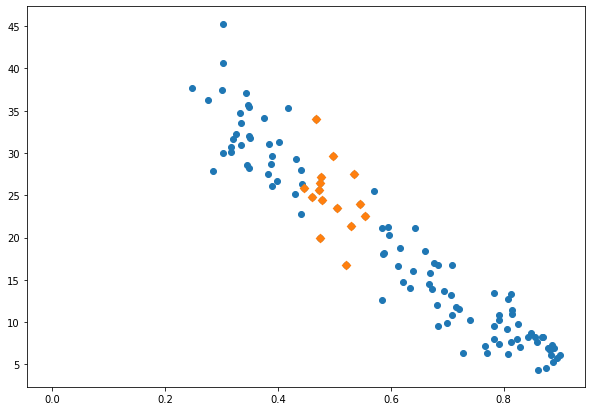

In [28]:
# 종속변수 추론하기
one = [[0.5]] # 독립변수 = x값
print(f'예측값: {knr.predict(one)}')
distances, indexes = knr.kneighbors(one)

plt.figure(figsize=(10,7))
plt.scatter(train_input, train_target)
# D
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
x = np.arange(start, end).reshape(-1, 1)
prediction = knr.predict(x)
plt.plot(x, prediction)
plt.show()

In [30]:
# 선형 회귀

lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.predict(one))

[24.2854091]


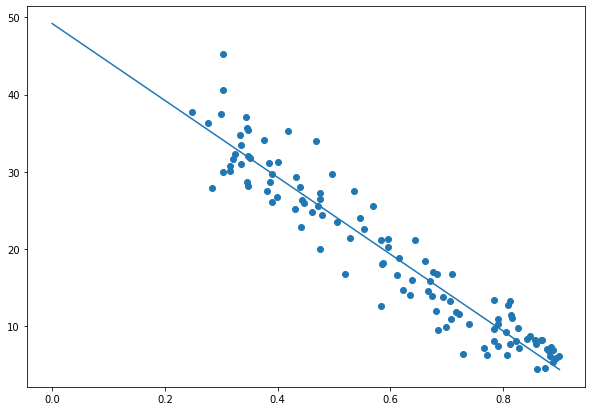

In [31]:
# coef_ = 가중치(w), intercept_ = 절편(b)
w = lr.coef_
b = lr.intercept_

plt.figure(figsize=(10,7))
plt.scatter(train_input, train_target)
plt.plot([start, end], [start*w+b, end*w+b])
plt.show()

In [34]:
# 비선형(다항) 회귀분석
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

print(train_poly.shape, test_poly.shape)

lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[0.5**2, 0.5]]))

(114, 2) (39, 2)
[23.67407245]


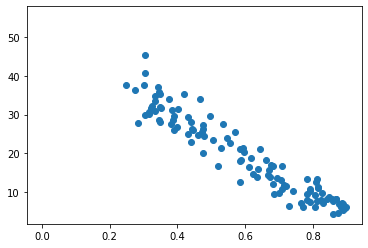

In [35]:
point = np.arange(start, end)
plt.scatter(train_input, train_target)
plt.plot(point, lr.coef_[0]*point**2 + lr.coef_[1]*point + lr.intercept_)
plt.show()